In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('PatientInfo.csv')
df.head(10)

,patient_id,global_num,sex,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,1000000001,2.0,male,1964.0,50s,Korea,Seoul,Gangseo-gu,NaN,overseas inflow,1.0,NaN,75.0,2020-01-22,2020-01-23,2020-02-05,NaN,released
1,1000000002,5.0,male,1987.0,30s,Korea,Seoul,Jungnang-gu,NaN,overseas inflow,1.0,NaN,31.0,NaN,2020-01-30,2020-03-02,NaN,released
2,1000000003,6.0,male,1964.0,50s,Korea,Seoul,Jongno-gu,NaN,contact with patient,2.0,2.002000e+09,17.0,NaN,2020-01-30,2020-02-19,NaN,released
3,1000000004,7.0,male,1991.0,20s,Korea,Seoul,Mapo-gu,NaN,overseas inflow,1.0,NaN,9.0,2020-01-26,2020-01-30,2020-02-15,NaN,released
4,1000000005,9.0,female,1992.0,20s,Korea,Seoul,Seongbuk-gu,NaN,contact with patient,2.0,1.000000e+09,2.0,NaN,2020-01-31,2020-02-24,NaN,released
5,1000000006,10.0,female,1966.0,50s,Korea,Seoul,Jongno-gu,NaN,contact with patient,3.0,1.000000e+09,43.0,NaN,2020-01-31,2020-02-19,NaN,released
6,1000000007,11.0,male,1995.0,20s,Korea,Seoul,Jongno-gu,NaN,contact with patient,3.0,1.000000e+09,0.0,NaN,2020-01-31,2020-02-10,NaN,released
7,1000000008,13.0,male,1992.0,20s,Korea,Seoul,etc,NaN,overseas inflow,1.0,NaN,0.0,NaN,2020-02-02,2020-02-24,NaN,released
8,1000000009,19.0,male,1983.0,30s,Korea,Seoul,Songpa-gu,NaN,overseas inflow,2.0,NaN,68.0,NaN,2020-02-05,2020-02-21,NaN,released
9,1000000010,21.0,female,1960.0,60s,Korea,Seoul,Seongbuk-gu,NaN,contact with patient,3.0,1.000000e+09,6.0,NaN,2020-02-05,2020-02-29,NaN,released


In [3]:
df.shape

(2218, 18)

In [4]:
df.columns

Index(['patient_id', 'global_num', 'sex', 'birth_year', 'age', 'country',
       'province', 'city', 'disease', 'infection_case', 'infection_order',
       'infected_by', 'contact_number', 'symptom_onset_date', 'confirmed_date',
       'released_date', 'deceased_date', 'state'],
      dtype='object')

In [5]:
# Number of Rows
df.shape[0]

2218

In [6]:
# Number of columns
df.shape[1]

18

In [7]:
# Count the null values for individual columns
t = pd.DataFrame(df.isnull().sum().sort_values(ascending=False)).reset_index()

In [8]:
t.columns = ['VarName', 'NullCount']
t[(t['NullCount']>0)]

,VarName,NullCount
0,disease,2199
1,deceased_date,2186
2,infection_order,2176
3,symptom_onset_date,2025
4,released_date,1995
5,contact_number,1807
6,infected_by,1749
7,infection_case,1055
8,global_num,904
9,birth_year,454


In [9]:
# Count the number of states
df.state.value_counts()

isolated    1791
released     307
deceased      32
Name: state, dtype: int64

In [10]:
# Add an age column
from datetime import date
today = date.today()
df['n_age'] = today.year - df['birth_year']

In [11]:
# Print the missing values by columns
df.isna().sum()

patient_id               0
global_num             904
sex                    145
birth_year             454
age                    261
country                  0
province                 0
city                    65
disease               2199
infection_case        1055
infection_order       2176
infected_by           1749
contact_number        1807
symptom_onset_date    2025
confirmed_date         141
released_date         1995
deceased_date         2186
state                   88
n_age                  454
dtype: int64

In [12]:
# Extract the data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2218 entries, 0 to 2217
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   patient_id          2218 non-null   int64  
 1   global_num          1314 non-null   float64
 2   sex                 2073 non-null   object 
 3   birth_year          1764 non-null   float64
 4   age                 1957 non-null   object 
 5   country             2218 non-null   object 
 6   province            2218 non-null   object 
 7   city                2153 non-null   object 
 8   disease             19 non-null     object 
 9   infection_case      1163 non-null   object 
 10  infection_order     42 non-null     float64
 11  infected_by         469 non-null    float64
 12  contact_number      411 non-null    float64
 13  symptom_onset_date  193 non-null    object 
 14  confirmed_date      2077 non-null   object 
 15  released_date       223 non-null    object 
 16  deceas

In [13]:
# Extract the information about disease column
df.disease.unique()

array([nan, True], dtype=object)

In [14]:
# Replace the nan with 0 and True with 1
import numpy as np
df.disease = df.disease.replace({True: 1, np.nan: 0})

In [15]:
# See again disease column
df.disease.unique()

array([0., 1.])

Fill null values in the following columns with their mean: 'global_number','birth_year','infection_order','infected_by'and 'contact_number'

In [16]:
fillna_mean_features = ['global_num','birth_year','infection_order','infected_by','contact_number', 'n_age']
for feature in fillna_mean_features:
    df[feature].fillna(df[feature].mean(), inplace=True)

In [17]:
#Lets see the missing values now
df.isna().sum()

patient_id               0
global_num               0
sex                    145
birth_year               0
age                    261
country                  0
province                 0
city                    65
disease                  0
infection_case        1055
infection_order          0
infected_by              0
contact_number           0
symptom_onset_date    2025
confirmed_date         141
released_date         1995
deceased_date         2186
state                   88
n_age                    0
dtype: int64

In [18]:
# Explore the sex column
df.sex.unique()

array(['male', 'female', nan], dtype=object)

In [19]:
# Remove nan
df = df[df.sex.notna()]

In [20]:
df.sex.unique()

array(['male', 'female'], dtype=object)

In [21]:
#Explore the age column
df.age.unique()

array(['50s', '30s', '20s', '60s', '80s', '70s', '40s', '10s', '90s',
       '0s', nan, '100s'], dtype=object)

In [22]:
#Remove nan of age row and data
df = df[df.age.notna()]

In [23]:
# Age unique values
df.age.unique()

array(['50s', '30s', '20s', '60s', '80s', '70s', '40s', '10s', '90s',
       '0s', '100s'], dtype=object)

In [24]:
#In column city the number of time nan appears
df.city.isna().sum()

62

In [25]:
df.shape

(1955, 19)

In [26]:
df = df[df.city.notna()]

In [27]:
df.shape

(1893, 19)

In [28]:
1893-1955

-62

In [29]:
# See the columns in df
df.columns

Index(['patient_id', 'global_num', 'sex', 'birth_year', 'age', 'country',
       'province', 'city', 'disease', 'infection_case', 'infection_order',
       'infected_by', 'contact_number', 'symptom_onset_date', 'confirmed_date',
       'released_date', 'deceased_date', 'state', 'n_age'],
      dtype='object')

In [30]:
# Drop disease column
df.drop('disease', axis = 'columns', inplace = True)

In [31]:
# Exploring the infection_case columns
df['infection_case'].unique()

array(['overseas inflow', 'contact with patient', 'Seongdong-gu APT',
       'etc', "Eunpyeong St. Mary's Hospital", 'Shincheonji Church',
       'Dongan Church', 'Guro-gu Call Center', 'Onchun Church',
       'Cheongdo Daenam Hospital', 'Suyeong-gu Kindergarten', nan,
       'Ministry of Oceans and Fisheries', 'gym facility in Cheonan',
       'gym facility in Sejong', 'River of Grace Community Church',
       'Pilgrimage to Israel'], dtype=object)

In [32]:
at = df['infection_case'].unique()
len(at)

17

In [33]:
df.infection_case.isna().sum()

872

In [34]:
df.infection_case = df.infection_case.replace(np.nan, 'etc')


In [35]:
at = df['infection_case'].unique()
len(at)

16

In [36]:
df['infection_case'].unique()

array(['overseas inflow', 'contact with patient', 'Seongdong-gu APT',
       'etc', "Eunpyeong St. Mary's Hospital", 'Shincheonji Church',
       'Dongan Church', 'Guro-gu Call Center', 'Onchun Church',
       'Cheongdo Daenam Hospital', 'Suyeong-gu Kindergarten',
       'Ministry of Oceans and Fisheries', 'gym facility in Cheonan',
       'gym facility in Sejong', 'River of Grace Community Church',
       'Pilgrimage to Israel'], dtype=object)

In [37]:
# Explore symptom_onset_date
df.symptom_onset_date.unique()

array(['2020-01-22', nan, '2020-01-26', '2020-02-06', '2020-02-11',
       '2020-02-21', '2020-02-19', '2020-02-24', '2020-02-25',
       '2020-02-23', '2020-02-26', '2020-02-20', '2020-02-27',
       '2020-02-18', '2020-03-01', '2020-03-02', '2020-03-06',
       '2020-03-04', '2020-02-28', '2020-03-05', '2020-03-07',
       '2020-02-29', '2020-03-08', '2020-03-09', '2020-03-10',
       '2020-03-11', '2020-03-12', '2020-03-15', '2020-03-13',
       '2020-03-16', '2020-02-15', '2020-01-19', '2020-01-31',
       '2020-02-22', '2020-03-03', '2020-03-17', '2020-02-13'],
      dtype=object)

In [38]:
# Replace nan with 0
df['symptom_onset_date'] = df.symptom_onset_date.replace(np.nan,0)

In [39]:
#Explore confirmed_data column
df.confirmed_date.unique()

array(['2020-01-23', '2020-01-30', '2020-01-31', '2020-02-02',
       '2020-02-05', '2020-02-06', '2020-02-07', '2020-02-16',
       '2020-02-19', '2020-02-20', '2020-02-21', '2020-02-22',
       '2020-02-23', '2020-02-26', '2020-02-24', '2020-02-25',
       '2020-02-27', '2020-02-28', '2020-02-29', '2020-03-01',
       '2020-03-02', '2020-03-04', '2020-03-05', '2020-03-06',
       '2020-03-07', '2020-03-08', '2020-03-09', '2020-03-10',
       '2020-03-11', '2020-03-12', '2020-03-13', '2020-03-14',
       '2020-03-15', '2020-03-16', '2020-03-17', '2020-03-18',
       '2020-03-03', '2020-02-18', '2020-01-20', '2020-01-26',
       '2020-01-27', '2020-02-01', '2020-02-09', '2020-02-10', nan],
      dtype=object)

In [40]:
df = df[df.confirmed_date.notna()]

In [41]:
# Explore relased data
df.released_date.unique()

array(['2020-02-05', '2020-03-02', '2020-02-19', '2020-02-15',
       '2020-02-24', '2020-02-10', '2020-02-21', '2020-02-29',
       '2020-02-27', nan, '2020-03-12', '2020-03-11', '2020-03-01',
       '2020-03-08', '2020-03-14', '2020-03-04', '2020-03-19',
       '2020-03-10', '2020-03-17', '2020-03-03', '2020-03-13',
       '2020-03-18', '2020-02-06', '2020-03-09', '2020-03-16',
       '2020-03-05', '2020-03-15', '2020-02-12', '2020-02-09',
       '2020-02-18', '2020-02-17', '2020-03-07', '2020-03-06',
       '2020-02-26'], dtype=object)

In [42]:
df.columns

Index(['patient_id', 'global_num', 'sex', 'birth_year', 'age', 'country',
       'province', 'city', 'infection_case', 'infection_order', 'infected_by',
       'contact_number', 'symptom_onset_date', 'confirmed_date',
       'released_date', 'deceased_date', 'state', 'n_age'],
      dtype='object')

In [43]:
df['released_date'] = df['released_date'].replace(np.nan, 0)

In [44]:
df.released_date.unique()

array(['2020-02-05', '2020-03-02', '2020-02-19', '2020-02-15',
       '2020-02-24', '2020-02-10', '2020-02-21', '2020-02-29',
       '2020-02-27', 0, '2020-03-12', '2020-03-11', '2020-03-01',
       '2020-03-08', '2020-03-14', '2020-03-04', '2020-03-19',
       '2020-03-10', '2020-03-17', '2020-03-03', '2020-03-13',
       '2020-03-18', '2020-02-06', '2020-03-09', '2020-03-16',
       '2020-03-05', '2020-03-15', '2020-02-12', '2020-02-09',
       '2020-02-18', '2020-02-17', '2020-03-07', '2020-03-06',
       '2020-02-26'], dtype=object)

In [45]:
#Exploring deceased date
df.deceased_date.unique()

array([nan, '2020-03-19', '2020-02-23', '2020-02-25', '2020-03-04',
       '2020-03-07', '2020-02-19', '2020-02-24', '2020-02-21'],
      dtype=object)

In [46]:
df['deceased_date'] = df.deceased_date.replace(np.nan,0)

In [47]:
df.deceased_date.unique()

array([0, '2020-03-19', '2020-02-23', '2020-02-25', '2020-03-04',
       '2020-03-07', '2020-02-19', '2020-02-24', '2020-02-21'],
      dtype=object)

In [48]:
#Exploring state column
df.state.unique()

array(['released', 'isolated', 'deceased', nan], dtype=object)

In [49]:
df = df[df['state'].notna()]

In [50]:
df.state.unique()

array(['released', 'isolated', 'deceased'], dtype=object)

In [51]:
#Exploring n_age column
df.n_age.unique()

array([ 59.        ,  36.        ,  32.        ,  31.        ,
        57.        ,  28.        ,  40.        ,  63.        ,
        61.        ,  85.        ,  71.        ,  80.        ,
        78.        ,  79.        ,  23.        ,  82.        ,
        87.        ,  38.        ,  62.        ,  43.        ,
        65.        ,  37.        ,  55.        ,  73.        ,
        69.        ,  58.        ,  53.        ,  39.        ,
        60.        ,  47.        ,  70.        ,  46.        ,
        44.        ,  24.        ,  30.        ,  67.        ,
        29.        ,  50.        ,  86.        ,  77.        ,
        33.        ,  88.        ,  68.        ,  49.        ,
        48.        ,  56.        ,  41.        ,  20.        ,
        27.        ,  35.        ,  72.        ,  26.        ,
        18.        ,  54.        ,  51.        ,  52.        ,
        94.        ,  10.        ,  42.        ,   3.        ,
        34.        ,  45.        ,  25.        ,  64.  

In [52]:
df.n_age.isna().sum()

0

In [53]:
#Exploring all column for nan
df.isna().sum()

patient_id            0
global_num            0
sex                   0
birth_year            0
age                   0
country               0
province              0
city                  0
infection_case        0
infection_order       0
infected_by           0
contact_number        0
symptom_onset_date    0
confirmed_date        0
released_date         0
deceased_date         0
state                 0
n_age                 0
dtype: int64

In [54]:
df.shape

(1891, 18)

In [55]:
df.isna().sum()

patient_id            0
global_num            0
sex                   0
birth_year            0
age                   0
country               0
province              0
city                  0
infection_case        0
infection_order       0
infected_by           0
contact_number        0
symptom_onset_date    0
confirmed_date        0
released_date         0
deceased_date         0
state                 0
n_age                 0
dtype: int64

In [56]:
# Remove data column from the data
df = df.drop(['symptom_onset_date','confirmed_date','released_date','deceased_date'],axis =1)

In [57]:
# Review the count of unique values in each column
df.nunique()

patient_id         1891
global_num         1139
sex                   2
birth_year           97
age                  11
country               4
province             16
city                126
infection_case       16
infection_order       7
infected_by         188
contact_number       65
state                 3
n_age                97
dtype: int64

In [58]:
df.nunique()/df.shape[0]

patient_id         1.000000
global_num         0.602327
sex                0.001058
birth_year         0.051296
age                0.005817
country            0.002115
province           0.008461
city               0.066631
infection_case     0.008461
infection_order    0.003702
infected_by        0.099418
contact_number     0.034373
state              0.001586
n_age              0.051296
dtype: float64

In [59]:
#Review the range of values per column
df.describe().T

,count,mean,std,min,25%,50%,75%,max
patient_id,1891.0,4.062127e+09,2.196706e+09,1.000000e+09,1.600000e+09,6.001000e+09,6.001001e+09,7.000000e+09
global_num,1891.0,4.565878e+03,2.130573e+03,1.000000e+00,3.980500e+03,4.664817e+03,5.664000e+03,8.717000e+03
birth_year,1891.0,1.975382e+03,1.787256e+01,1.916000e+03,1.965000e+03,1.974989e+03,1.991000e+03,2.020000e+03
infection_order,1891.0,2.285865e+00,1.847202e-01,1.000000e+00,2.285714e+00,2.285714e+00,2.285714e+00,6.000000e+00
infected_by,1891.0,2.646312e+09,7.516320e+08,1.000000e+09,2.600789e+09,2.600789e+09,2.600789e+09,6.113000e+09
contact_number,1891.0,2.298088e+01,2.982273e+01,0.000000e+00,2.412895e+01,2.412895e+01,2.412895e+01,1.091000e+03
n_age,1891.0,4.761777e+01,1.787256e+01,3.000000e+00,3.200000e+01,4.801134e+01,5.800000e+01,1.070000e+02


In [60]:
#Check for duplicated rows
df.duplicated().sum()

0

In [61]:
# Select categorical variables from the data
dfo = df.select_dtypes(include = 'object',exclude = 'datetime')
dfo.nunique()

sex                 2
age                11
country             4
province           16
city              126
infection_case     16
state               3
dtype: int64

In [62]:
vn = dfo.nunique().reset_index()
vn.columns = ['Variable_name','Counts']
vn.sort_values(by = 'Counts')

,Variable_name,Counts
0,sex,2
6,state,3
2,country,4
1,age,11
3,province,16
5,infection_case,16
4,city,126


<AxesSubplot:>

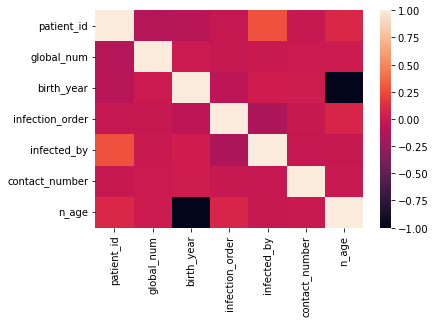

In [63]:
import seaborn as sns
# Plot the heat map for checking correlations
sns.heatmap(df.corr())

In [64]:
df.corr()

,patient_id,global_num,birth_year,infection_order,infected_by,contact_number,n_age
patient_id,1.000000,-0.104879,-0.087258,-0.028745,0.274019,-0.018634,0.087258
global_num,-0.104879,1.000000,-0.005703,-0.016797,-0.008419,-0.003310,0.005703
birth_year,-0.087258,-0.005703,1.000000,-0.073419,0.016758,0.011336,-1.000000
infection_order,-0.028745,-0.016797,-0.073419,1.000000,-0.144587,-0.022764,0.073419
infected_by,0.274019,-0.008419,0.016758,-0.144587,1.000000,-0.027794,-0.016758
contact_number,-0.018634,-0.003310,0.011336,-0.022764,-0.027794,1.000000,-0.011336
n_age,0.087258,0.005703,-1.000000,0.073419,-0.016758,-0.011336,1.000000


In [68]:
df_box = df.drop(['patient_id','infected_by'],axis = 1)
df_box.nunique()

global_num         1139
sex                   2
birth_year           97
age                  11
country               4
province             16
city                126
infection_case       16
infection_order       7
contact_number       65
state                 3
n_age                97
dtype: int64

<AxesSubplot:>

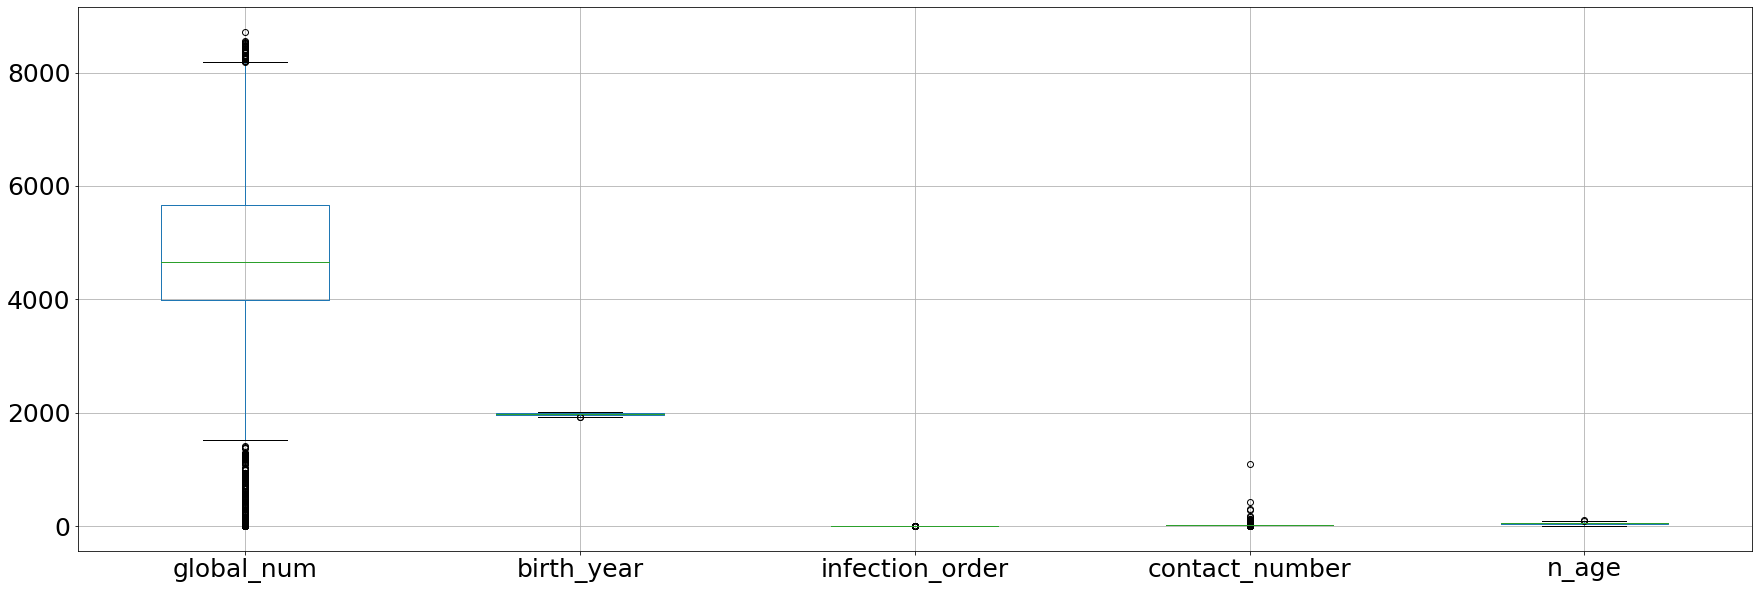

In [73]:
#Box plot for checking outliers
df_box.boxplot(fontsize = 25,figsize = (30,10))

In [74]:
#Create dummy features for object type features
dfo.columns

Index(['sex', 'age', 'country', 'province', 'city', 'infection_case', 'state'], dtype='object')

In [76]:
X = pd.get_dummies(df[['sex', 'age', 'country', 'province', 'city', 'infection_case']])
y = df['state']

In [78]:
X.columns

Index(['sex_female', 'sex_male', 'age_0s', 'age_100s', 'age_10s', 'age_20s',
       'age_30s', 'age_40s', 'age_50s', 'age_60s',
       ...
       'infection_case_Pilgrimage to Israel',
       'infection_case_River of Grace Community Church',
       'infection_case_Seongdong-gu APT', 'infection_case_Shincheonji Church',
       'infection_case_Suyeong-gu Kindergarten',
       'infection_case_contact with patient', 'infection_case_etc',
       'infection_case_gym facility in Cheonan',
       'infection_case_gym facility in Sejong',
       'infection_case_overseas inflow'],
      dtype='object', length=175)

In [79]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 1)

In [80]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(X_train)

In [81]:
scaler

StandardScaler()

In [82]:
X_train_scaled=scaler.transform(X_train)

In [83]:
X_train

,sex_female,sex_male,age_0s,age_100s,age_10s,age_20s,age_30s,age_40s,age_50s,age_60s,...,infection_case_Pilgrimage to Israel,infection_case_River of Grace Community Church,infection_case_Seongdong-gu APT,infection_case_Shincheonji Church,infection_case_Suyeong-gu Kindergarten,infection_case_contact with patient,infection_case_etc,infection_case_gym facility in Cheonan,infection_case_gym facility in Sejong,infection_case_overseas inflow
283,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
304,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
614,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1982,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2089,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
2113,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
1271,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
235,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [86]:
X_train_scaled.shape

(1512, 175)

In [87]:
X_train.shape

(1512, 175)

In [102]:
X_train_scaled[-1,0]

0.907680669524646

In [98]:
bs = np.array(X_train)

In [106]:
bs[-1,0]

1

In [107]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=300, random_state=1,n_jobs=-1)
model_res = clf.fit(X_train_scaled,y_train,)

In [108]:
model_res

RandomForestClassifier(n_estimators=300, n_jobs=-1, random_state=1)

In [110]:
X_test_scaled=scaler.transform(X_test)

In [111]:
y_pred = model_res.predict(X_test_scaled)

In [114]:
y_pred_proba = model_res.predict_proba(X_test_scaled)

In [116]:
y_pred_proba.shape

(379, 3)

In [117]:
y_pred.shape

(379,)

In [119]:
lr_probs = y_pred_proba[:,1]

In [120]:
lr_probs.shape

(379,)

In [126]:
from sklearn.metrics import accuracy_score, f1_score
ac = accuracy_score(y_test,y_pred)

In [127]:
ac

0.8100263852242744

In [128]:
f1 = f1_score(y_test, y_pred, average='weighted')

In [129]:
f1

0.7784998698601125

In [130]:
feature_importance = clf.feature_importances_

In [131]:
feature_importance

array([3.61928751e-02, 3.62853375e-02, 9.74058719e-03, 0.00000000e+00,
       2.00932705e-02, 3.89550382e-02, 3.02487917e-02, 3.30978808e-02,
       3.74341515e-02, 2.44397884e-02, 1.23104528e-02, 7.12719640e-03,
       9.70093731e-04, 1.53316812e-02, 1.22682420e-02, 2.44046580e-03,
       1.63153367e-04, 1.49587856e-02, 2.12717780e-03, 1.01182422e-02,
       2.44662219e-03, 7.92875326e-03, 3.44843469e-03, 1.13370586e-02,
       1.27355684e-02, 1.94108095e-02, 2.24016112e-03, 2.79129037e-03,
       3.23685677e-03, 1.97919626e-03, 2.13536446e-03, 1.23303706e-02,
       1.09429256e-02, 2.37081618e-05, 3.06305557e-06, 2.21238856e-03,
       2.66388098e-03, 2.66941184e-03, 3.58511882e-03, 4.24370642e-04,
       2.64383087e-03, 3.18996720e-03, 7.27558540e-03, 1.77454965e-02,
       5.41682483e-03, 3.28441180e-03, 1.27290765e-04, 9.26156499e-03,
       1.46001570e-04, 2.04334597e-04, 6.82451114e-04, 1.89273136e-04,
       4.07442348e-05, 1.36501453e-04, 3.93145059e-04, 1.96021723e-03,
      

In [145]:
feature_importance = 100*(feature_importance/feature_importance.max())[:30]

In [155]:
100*(feature_importance/feature_importance.max())[:30]

array([ 92.90935603,  93.14671253,  25.00469167,   0.        ,
        51.58067214, 100.        ,  77.65052495,  84.9643136 ,
        96.09578946,  62.73845325,  31.6016961 ,  18.29595535,
         2.4902908 ,  39.35737678,  31.4933384 ,   6.26482712,
         0.41882482,  38.40013068,   5.46059739,  25.97415544,
         6.28063095,  20.35360153,   8.85234581,  29.10293269,
        32.69299429,  49.8287523 ,   5.75063258,   7.16541556,
         8.30921214,   5.08071958])

In [146]:
sorted_idx = np.argsort(feature_importance)[:30]

In [157]:
(feature_importance)[:30]

array([75.73463368, 75.92811374, 20.38245925,  0.        , 42.04574735,
       81.51453946, 63.2964678 , 69.25826893, 78.33204021, 51.14096123,
       25.75997704, 14.91386374,  2.02994907, 32.08198442, 25.67164976,
        5.10674497,  0.34140312, 31.30168967,  4.45118081, 21.17271318,
        5.11962739, 16.59114455,  7.21594892, 23.72312155, 26.64954373,
       40.61767795,  4.68760166,  5.8408555 ,  6.77321601,  4.14152517])

In [158]:
np.argsort(feature_importance)[:30]

array([ 3, 16, 12, 29, 18, 26, 15, 20, 27, 28, 22, 11, 21,  2, 19, 23, 14,
       10, 24, 17, 13, 25,  4,  9,  6,  7,  0,  1,  8,  5])

In [147]:
sorted_idx

array([ 3, 16, 12, 29, 18, 26, 15, 20, 27, 28, 22, 11, 21,  2, 19, 23, 14,
       10, 24, 17, 13, 25,  4,  9,  6,  7,  0,  1,  8,  5])

In [148]:
np.arange(sorted_idx.shape[0]) + .5

array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
       11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
       22.5, 23.5, 24.5, 25.5, 26.5, 27.5, 28.5, 29.5])

In [149]:
sorted_idx.shape[0]

30

In [150]:
np.arange(30)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])

In [151]:
pos = np.arange(sorted_idx.shape[0]) + .5
print(pos.size)

30


In [152]:
sorted_idx.size

30

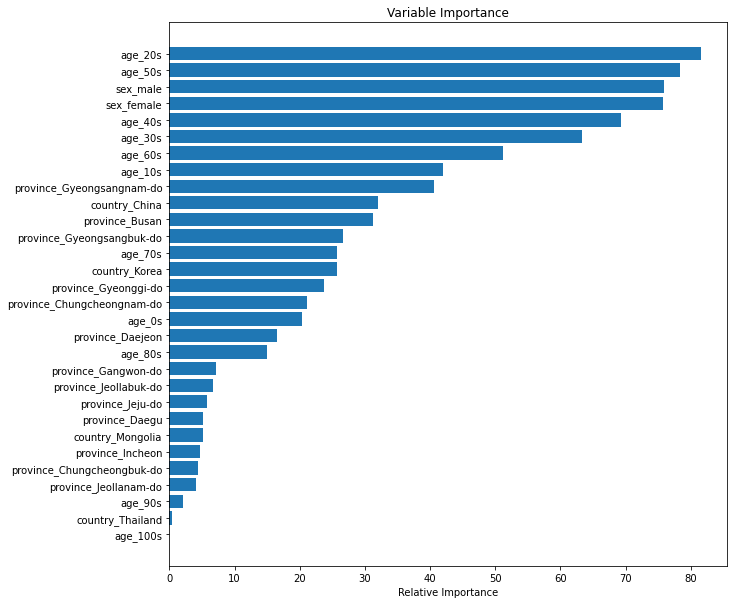

In [154]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [159]:
X.columns[sorted_idx]

Index(['age_100s', 'country_Thailand', 'age_90s', 'province_Jeollanam-do',
       'province_Chungcheongbuk-do', 'province_Incheon', 'country_Mongolia',
       'province_Daegu', 'province_Jeju-do', 'province_Jeollabuk-do',
       'province_Gangwon-do', 'age_80s', 'province_Daejeon', 'age_0s',
       'province_Chungcheongnam-do', 'province_Gyeonggi-do', 'country_Korea',
       'age_70s', 'province_Gyeongsangbuk-do', 'province_Busan',
       'country_China', 'province_Gyeongsangnam-do', 'age_10s', 'age_60s',
       'age_30s', 'age_40s', 'sex_female', 'sex_male', 'age_50s', 'age_20s'],
      dtype='object')

In [160]:
X.columns

Index(['sex_female', 'sex_male', 'age_0s', 'age_100s', 'age_10s', 'age_20s',
       'age_30s', 'age_40s', 'age_50s', 'age_60s',
       ...
       'infection_case_Pilgrimage to Israel',
       'infection_case_River of Grace Community Church',
       'infection_case_Seongdong-gu APT', 'infection_case_Shincheonji Church',
       'infection_case_Suyeong-gu Kindergarten',
       'infection_case_contact with patient', 'infection_case_etc',
       'infection_case_gym facility in Cheonan',
       'infection_case_gym facility in Sejong',
       'infection_case_overseas inflow'],
      dtype='object', length=175)

In [161]:
class_names=['isolated','released','missing','deceased'] # name of classes

Confusion matrix, without normalization
[[  0   3   0]
 [  1 294  16]
 [  0  52  13]]
Normalized confusion matrix
[[0.   1.   0.  ]
 [0.   0.95 0.05]
 [0.   0.8  0.2 ]]


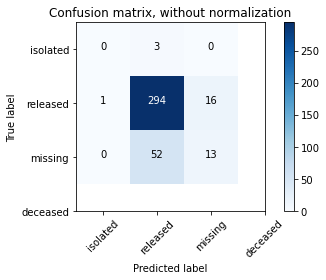

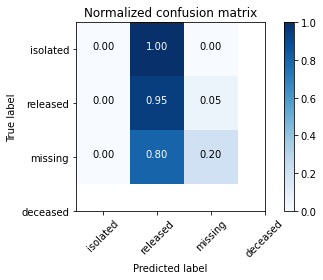

In [162]:
import itertools
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')
#plt.savefig('figures/RF_cm_multi_class.png')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')
#plt.savefig('figures/RF_cm_proportion_multi_class.png', bbox_inches="tight")
plt.show()

In [164]:
cnf_matrix

array([[  0,   3,   0],
       [  1, 294,  16],
       [  0,  52,  13]])

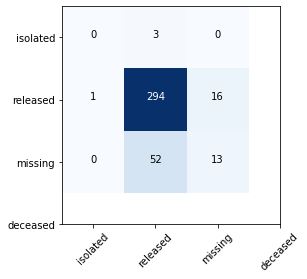

In [174]:
classes = class_names
plt.imshow(cnf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
thresh = cnf_matrix.max() / 2.
for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
    fmt =  'd'
    plt.text(j, i, format(cnf_matrix[i, j], fmt),
        horizontalalignment="center",
        color="white" if cnf_matrix[i, j] > thresh else "black")

Text(1, 1, '1')

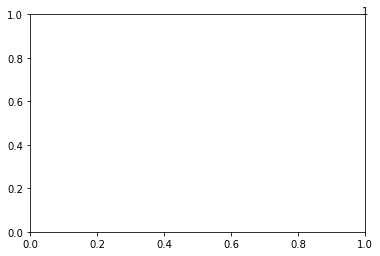

In [183]:
plt.text(1, 1, format(1, fmt),horizontalalignment="center",
        color="white" if 300 < thresh else "black")

In [181]:
thresh

147.0

In [210]:
A = np.array([[1,2,3],[2,3,4],[4,5,6]])
A

array([[1, 2, 3],
       [2, 3, 4],
       [4, 5, 6]])

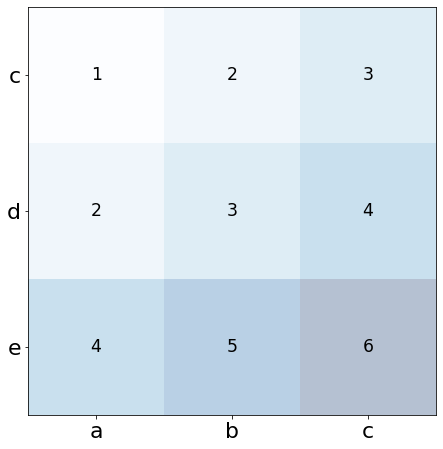

In [212]:
fig,ax = plt.subplots(figsize=(7.5,7.5))
ax.matshow(A,cmap=plt.cm.Blues,alpha = 0.3)
for i in range(A.shape[0]):
    for j in range(A.shape[1]):
        ax.text(x = j, y = i, s = A[i,j],va='center',ha='center',size = 'xx-large')
ax.set(xticks=range(A.shape[0]), xticklabels=['a', 'b','c'], yticks=range(A.shape[1]), yticklabels=['c','d','e'])
ax.xaxis.set_ticks_position('bottom')
ax.tick_params(axis='x', labelbottom=True,labelsize = 22)
ax.tick_params(axis='y', labelsize = 22)

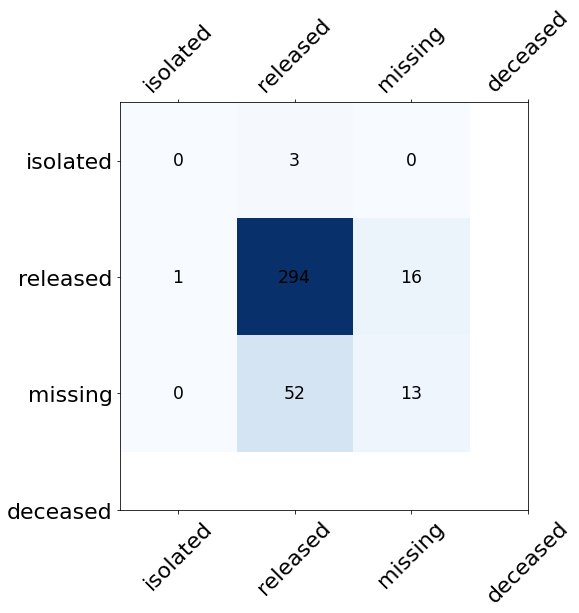

In [260]:
fig,ax = plt.subplots(figsize=(7.5,7.5))
ax.matshow(cnf_matrix,cmap=plt.cm.Blues)
for i in range(cnf_matrix.shape[0]):
    for j in range(cnf_matrix.shape[1]):
        ax.text(x = j, y = i, s = cnf_matrix[i,j],va='center',ha='center',size = 'xx-large')
#ax.set(xticks=range(cnf_matrix.shape[0]), xticklabels=classes, yticks=range(cnf_matrix.shape[1]), yticklabels=classes)
#ax.xaxis.set_ticks_position('bottom')
ax.tick_params(axis='x',labelbottom=True, labelsize = 22)
ax.tick_params(axis='y', labelsize = 22)
tick_marks = np.arange(len(classes))
#tick_marks = range(cnf_matrix.shape[0]+1)
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes);

In [216]:
classes

['isolated', 'released', 'missing', 'deceased']

In [225]:
b = np.arange(len(classes))

In [226]:
b

array([0, 1, 2, 3])

In [221]:
len(classes)

4

In [240]:
c = np.arange(len(classes))

In [241]:
c

array([0, 1, 2, 3])

In [242]:
c[1]

1

In [253]:
tick_marks = np.arange(len(classes))
#tick_marks = range(cnf_matrix.shape[0])

In [244]:
tick_marks

array([0, 1, 2, 3])

In [245]:
tick_marks = range(cnf_matrix.shape[0])

In [246]:
tick_marks

range(0, 3)

In [255]:
tick_marks[3]

3

In [256]:
cnf_matrix.shape[0]

3